# "Profitable App Profiles for iOS and Android"

> "A project that aims to determine profitable kinds of apps for the Apple and Google Play app stores."

- author: Migs Germar
- toc: true
- branch: master
- badges: true
- comments: true
- categories: [python, pandas, matplotlib]
- image: 
- hide: false
- search_exclude: false

Welcome. I wrote this notebook as a guided project in the [Dataquest](https://dataquest.io) Data Scientist Path. The hypothetical app company situation and project flow came from the course. However, all of the text and code themselves are written by me.

Originally, this notebook was intended for Python beginners who would use a list-of-lists for a dataset. However, I used `pandas` DataFrames and `matplotlib.pyplot` graphs because I already had some experience with them beforehand.

# Overview

In this project, we will be working on data about different types of apps and their corresponding number of users. The goal is to determine which apps can best attract the largest number of users.

This will help a hypothetical app company make decisions regarding what apps to develop in the near future. This app company only makes free apps directed toward an English-speaking audience. This information will be considered in the criteria.

# Package Installs

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# for fastpages
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

# App Data Overview

This project uses two datasets.

- The Google Play Store dataset lists over 10,000 Android apps.
- The Apple App Store dataset lists over 7,000 iOS apps.

In [108]:
data_apple = pd.read_csv("./2021-05-08-Files/AppleStore.csv", header = 0)
data_google = pd.read_csv("./2021-05-08-Files/googleplaystore.csv", header = 0)

## Apple App Store dataset

In [109]:
#collapse_hide
print(data_apple.shape)

(7197, 16)


The dataset has 7197 rows (1 row per app), and 16 columns which describe these apps.

According to the Kaggle documentation ([Mobile App Store ( 7200 apps)](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)), the following are the columns and their meanings.

- "id" : App ID
- "track_name": App Name
- "size_bytes": Size (in Bytes)
- "currency": Currency Type
- "price": Price amount
- "ratingcounttot": User Rating counts (for all version)
- "ratingcountver": User Rating counts (for current version)
- "user_rating" : Average User Rating value (for all version)
- "userratingver": Average User Rating value (for current version)
- "ver" : Latest version code
- "cont_rating": Content Rating
- "prime_genre": Primary Genre
- "sup_devices.num": Number of supporting devices
- "ipadSc_urls.num": Number of screenshots showed for display
- "lang.num": Number of supported languages
- "vpp_lic": Vpp Device Based Licensing Enabled

A sample of the first 5 rows of the dataset is shown below.

In [110]:
data_apple.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


## Google Play Store dataset

In [111]:
print(data_google.shape)

(10841, 13)


The dataset has 10841 rows and 13 columns.

The column are self-explanatory, so the Kaggle documentation ([Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps)) does not describe them.

In [112]:
print(list(data_google.columns))

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


Below is a sample of the dataset.

In [113]:
data_google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data Cleaning

Before analysis, the data must first be cleaned of unwanted datapoints.

## Inaccurate Data

[This Kaggle discussion](https://www.kaggle.com/lava18/google-play-store-apps/discussion/164101) about the Google Play dataset indicates that row 10472 (excluding the header) has an error.

Below, I have printed row 0 and row 10472 so that these can be compared.

In [114]:
data_google.iloc[[0, 10472]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


As we look at row 10472 in the context of the column headers and row 0, the following things become clear.

- The "Category" value is not present. Thus, all values to the right of it have been shifted leftward.
- The "Android Ver" column was left with a missing value.

Thus, this row will be removed.

In [115]:
# This if-statement prevents more rows from being deleted
# if the cell is run again.
if data_google.iloc[10472, 0] == 'Life Made WI-Fi Touchscreen Photo Frame':
    data_google.drop(10472, inplace = True)
    print("The inaccurate row was deleted.")

The inaccurate row was deleted.


## Duplicate Data

There are also duplicate app entries in the Google Play dataset. We can consider a row as a duplicates if another row exists that has the same "App" value.

Here, I count the total number of duplicate rows. This turns out to be 1979 rows.

In [116]:
def count_duplicates(df, col_name):
    
    """Count the number of duplicate rows in a DataFrame.
    `col_name` is the name of the column to be used as a basis
    for duplicate values."""
    
    all_apps = {}
    
    for index, row in df.iterrows():
        name = row[col_name]
        all_apps.setdefault(name, []).append(index)
            
    duplicate_inds = [ind
                      for lst in all_apps.values()
                      for ind in lst
                      if len(lst) > 1]
    
    n_duplicates = "Duplicates: {}".format(len(duplicate_inds))
    duplicate_rows = df.iloc[duplicate_inds]
    
    return n_duplicates, duplicate_rows
    
google_dupes = count_duplicates(data_google, "App")
print(google_dupes[0])

Duplicates: 1979


As an example, there are 4 rows for Instagram:

In [117]:
ig_filter = data_google["App"] == "Instagram"
ig_rows = data_google.loc[ig_filter]

In [118]:
ig_rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


Looking closely, we can see that duplicate rows are not exactly identical. The "Reviews" column, which shows the total number of reviews of the app, has different values.

It can be inferred that the row with the largest value is the newest entry for the app. Therefore, all duplicate rows will be dropped except for the ones with the largest "Reviews" values.

In [119]:
def remove_duplicates(df, name_col, reviews_col):

    # Each key-value pair will follow the format:
    # {"App Name": maximum number of reviews among all duplicates}
    reviews_max = {}

    for index, row in df.iterrows():
        name = row[name_col]
        n_reviews = int(row[reviews_col])

        if n_reviews > reviews_max.get(name, -1):
            reviews_max[name] = n_reviews

    # List of duplicate indices to drop,
    # excluding the row with the highest number of reviews
    # among that app's duplicate rows.
    indices_to_drop = []

    # Rows with names that have already been added into this list
    # will be dropped.
    already_added = []

    for index, row in df.iterrows():
        name = row[name_col]
        n_reviews = int(row[reviews_col])

        if (name not in already_added) and (n_reviews == reviews_max[name]):
            already_added.append(name)
        else:
            indices_to_drop.append(index)

    # Remove duplicates and return the clean dataset.
    clean = df.drop(indices_to_drop)
    return clean

android_clean = remove_duplicates(data_google, "App", "Reviews")
print(android_clean.shape)

(9659, 13)


After duplicates were removed, the Google Play dataset was left with 9659 rows.

As for the Apple App Store dataset, there are 4 duplicate rows.

In [120]:
apple_dupes = count_duplicates(data_apple, "track_name")

print(apple_dupes[0])

apple_dupes[1]

Duplicates: 4


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
2948,1173990889,Mannequin Challenge,109705216,USD,0.0,668,87,3.0,3.0,1.4,9+,Games,37,4,1,1
4463,1178454060,Mannequin Challenge,59572224,USD,0.0,105,58,4.0,4.5,1.0.1,4+,Games,38,5,1,1
4442,952877179,VR Roller Coaster,169523200,USD,0.0,107,102,3.5,3.5,2.0.0,4+,Games,37,5,1,1
4831,1089824278,VR Roller Coaster,240964608,USD,0.0,67,44,3.5,4.0,0.81,4+,Games,38,0,1,1


The "rating_count_tot" column in the Apple App Store dataset is like the "Reviews" column in the Google Play dataset. It tells the total number of reviews so far. Therefore, Apple App Store dataset duplicates can be removed by keeping the rows with the highest rating count totals.

In [121]:
ios_clean = remove_duplicates(data_apple, "track_name", "rating_count_tot")
print(ios_clean.shape)

(7195, 16)


From 7197 rows, there are now 7195 rows in the Apple App Store dataset.

## Non-English Apps

The hypothetical app company who will use this analysis is a company that only makes apps in English. Thus, all apps with non-English titles shall be removed from the datasets.

The task now is to identify titles which are not in English. It is known that in the [ASCII table](https://theasciicode.com.ar/), the characters most commonly used in English are within codes 0 to 127. Some English app titles may have special characters or emojis, though, so I will only remove titles which have more than 3 characters outside of the normal range.

In [122]:
def is_english(text):
    unicode = [ord(char) for char in text]
    normal = [(code >= 0 and code <= 127) for code in unicode]
    non_english = len(text) - sum(normal)

    return non_english <= 3

def keep_english(df, name_col):
    
    """Return a new DataFrame containing only rows with English names."""
    
    remove_indices = []
    
    for index, row in df.iterrows():
        name = row[name_col]
        if not is_english(name):
            remove_indices.append(index)
            
    return df.drop(remove_indices)

android_clean = keep_english(android_clean, "App")
ios_clean = keep_english(ios_clean, "track_name")

print("Google Play Store Dataset:", android_clean.shape)
print("Apple App Store Dataset:", ios_clean.shape)

Google Play Store Dataset: (9614, 13)
Apple App Store Dataset: (6181, 16)


Now, there are only English apps in both datasets.

## Paid Apps

As mentioned earlier, the app company only makes free apps. Therefore, data on paid apps is irrelevant to this analysis. Paid apps shall be identified and removed from both datasets.

In [123]:
def remove_paid(df, price_col):
    
    """Return a new DataFrame without paid apps."""
    
    remove_indices = []
    
    for index, row in df.iterrows():
        price = str(row[price_col])
        
        # Keep characters that are numeric or periods.
        price = float(re.sub("[^0-9.]", "", price))
        
        if price != 0.0:
            remove_indices.append(index)
            
    return df.drop(remove_indices)
        
android_clean = remove_paid(android_clean, "Price")
ios_clean = remove_paid(ios_clean, "price")

print("Google Play Store Dataset:", android_clean.shape)
print("Apple App Store Dataset:", ios_clean.shape)

Google Play Store Dataset: (8864, 13)
Apple App Store Dataset: (3220, 16)


Now that the datasets have been cleaned, we can proceed with our main objective, which is to determine a profitable app profile.

#  App Company's Context
​
Before thinking of an app profile, we must know the context of the app company so that we can align our analysis with it.
​
Since they only develop free apps, they get revenue from in-app advertisements. Thus, they rely on having a large number of users so that they can generate more revenue.
​
An app should ideally also be successful on both Google Play Store and the Apple App Store. The reason is that the (hypothetical) company has the following 3-step validation strategy:
​
>1. Build a minimal Android version of the app, and add it to Google Play.
>2. If the app has a good response from users, we develop it further.
>3. If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.
​
# Common App Genres
​
With these criteria in mind, the first step would be to find out which genres of apps are most common in both app markets. If an app genre is common, then there may be high demand for it among users.
​
Let us now look at the column headers for both datasets to see which columns can give information about genres.

In [124]:
print("Google Play Store")
android_clean.head()

Google Play Store


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [125]:
print("\nApple App Store")
ios_clean.head()


Apple App Store


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


For Google Play, some columns that seem relevant are "Category" and "Genres". For the Apple App Store, the relevant column is "prime_genre".

We can determine the most common genres by using frequency tables of the mentioned columns.

In [153]:
def freq_table(df, label):
    """Return a frequency table of the values in a column of a DataFrame."""
    col = df[label]
    freq = {}
    
    for value in col:
        freq.setdefault(value, 0)
        freq[value] += 1
        
    for key in freq:
        freq[key] /= len(df) / 100
        
    freq_series = pd.Series(freq).sort_values(ascending = False)
    
    return freq_series

def sr_to_df(sr, col_name = "number", n_head = None):
    """Return a DataFrame by resetting the index of a Series."""
    
    df = sr.rename(col_name).reset_index()
    if n_head is not None:
        df = df.head(n_head)
        
    return df

google_categories = freq_table(android_clean, "Category")
google_genres = freq_table(android_clean, "Genres")
apple_genres = freq_table(ios_clean, "prime_genre")

The frequency tables will be inspected in the sections below. Only the top positions in each table will be shown, for brevity.

## Apple App Store: Prime Genres

First, the frequency table of Apple App Store prime genres shall be analyzed. Below, I have ordered the table by frequency, descending. I have also made bar graphs.

In [276]:
import altair as alt

def bar_n(series, chart_title, ylabel, n = 5, shorten = False):
    
    df = series.rename("number").reset_index()
    df["number"] = [round(i, 2) for i in df["number"]]
    
    #df = df[:n]

    bar = alt.Chart(df).mark_bar().encode(
        x = alt.X("index", title = "Name", sort = "-y"),
        y = alt.Y("number", title = ylabel),
    ).properties(
        title = chart_title,
    )
    
    text = bar.mark_text(
        align = 'center',
        baseline = 'middle',
        dy = -5, # Nudge text
    ).encode(
        text = 'number:Q'
    )
    
    chart = (bar + text).properties(
        width = 800,
        height = 400,
    )
    
    
    
    return chart

#     """Takes a Pandas Series.
#     Shows a Pyplot bar graph of the first n values.
#     Uses the series indices as the tick labels.
#     Specify the title and ylabel."""
    
#     ticks = list(series[:n].index)
#     if shorten:
#         ticks = [text[:8] + "..." for text in ticks]
    
#     fig, ax = plt.subplots(figsize=(2 + n, 5))
#     ax.bar(
#         x = range(n),
#         height = series[:n],
#         tick_label = ticks,)

#     ax.set_title(title)
#     ax.set_xlabel("Type")
#     ax.set_ylabel(ylabel)
#     ax.grid(True)

sr_to_df(apple_genres, "percentage", n_head = 5)

,index,percentage
0,Games,58.136646
1,Entertainment,7.888199
2,Photo & Video,4.968944
3,Education,3.664596
4,Social Networking,3.291925


In [279]:
bar_n(
    apple_genres,
    "Most Common Prime Genres of iOS Apps",
    "Percentage of Apps",
)

alt.LayerChart(...)

The top 5 most common prime genres in the Apple App Store are Games, Entertainment, Photo & Video, Education, and Social Networking. Games are at the top, occupying over 58% of all apps. This is a much higher percentage than any other single genre occupies.

The general impression is that there are many more apps in entertainment-related genres compared to practical genres.

## Google Play Store: Categories

Next, below is the frequency table for Google Play Store app categories.

In [155]:
sr_to_df(google_categories, "percentage", 5)

,index,percentage
0,FAMILY,18.907942
1,GAME,9.724729
2,TOOLS,8.461191
3,BUSINESS,4.591606
4,LIFESTYLE,3.903430


In [280]:
bar_n(
    google_categories,
    "Most Common Categories of Android Apps",
    "Percentage of Apps",
)

alt.LayerChart(...)

The picture here seems to be different. The most common category is Family occupying almost 19% of all apps, followed by Game, Tools, Business, and Lifestyle.

Generally, the table suggests that practical app categories are more common in Google Play than in the Apple App Store.

## Google Play Store: Genres

Lastly, below is the frequency table for Google Play Store app genres.

In [156]:
sr_to_df(google_genres, "percentage", 5)

,index,percentage
0,Tools,8.449910
1,Entertainment,6.069495
2,Education,5.347473
3,Business,4.591606
4,Productivity,3.892148


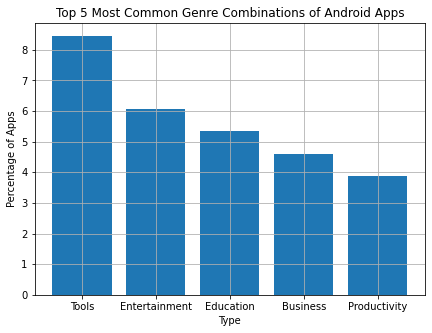

In [132]:
bar_n(
    google_genres,
    "Top 5 Most Common Genre Combinations of Android Apps",
    "Percentage of Apps",
)

There are 114 genres in this table, so it is not fully displayed. However, it would appear that the top genres are Tools (8%), Entertainment, Education, Business, and Lifestyle. Like with the categories, practical apps are very common.

However, I noticed something special about this frequency table. Some genres are actually combinations of multiple genres, separated by semi-colons. If I can extract and count individual genres from these combined genres, then I can get a more accurate idea of app genres in the Google Play Store.

Note that this frequency table will show numbers instead of percentages, because some apps have multiple genres. The percentages would not add up to 100%.

In [157]:
freq = {}
for value in android_clean["Genres"]:
    genres = value.split(";")
    for genre in genres:
        freq.setdefault(genre, 0)
        freq[genre] += 1

google_genres_split = pd.Series(freq).sort_values(ascending = False)

sr_to_df(google_genres_split, n_head = 5)

,index,number
0,Tools,750
1,Education,606
2,Entertainment,569
3,Business,407
4,Lifestyle,347


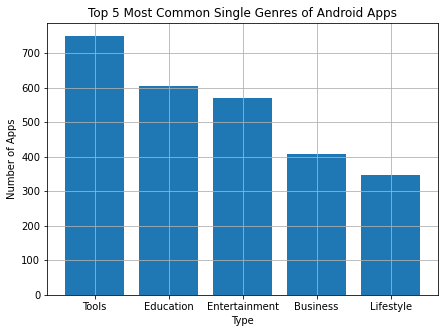

In [134]:
bar_n(
    google_genres_split,
    "Top 5 Most Common Single Genres of Android Apps",
    "Number of Apps",
)

It can be seen that the frequency table has slightly different placements now. However, the top genres are still Tools, Education, Entertainment, Business, and Lifestyle. Practical app genres are very common in the Google Play Store. They are more common here than in the Apple App Store.

Based on the results, the Google Play Store has a selection of apps that is more balanced between entertainment and practicality.

___

Going back to the the frequency table of Categories, since it seems that each Category represents a group of Genres. For example, one would expect apps in the Simulation, Arcade, Puzzle, Strategy, etc. genres to be under the Game category. It was shown earlier that this category is the 2nd most common in the Google Play Store.

The Categories column is more general and thus gives a more accurate picture of the common types of apps. Thus, from here on, I will be analyzing __only the `"Category"` column and not the `"Genres"` column__. 

Also, I will use "app type" to generally refer to the Apple App Store's `"prime_genre"` values or the Google Play Store's `"Category"` values.

# App Types by Number of Users

We first looked at app types in terms of how common they are in the two app markets. Now, we shall see how many users there are for each app type.

## Apple Prime Genres: Rating Counts

In the Apple App Store dataset, there is no column that indicates the number of users.

In [135]:
print(list(ios_clean.columns))

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


However, the `"rating_count_tot"` column exists. It indicates the total number of ratings given to each app. We can use it as a proxy for the number of users of each app.

The function below will return a Series showing the average number of users per app within each type. (Not the total number of users per type.)

In [158]:
def users_by_type(df, type_col, users_col, moct = "mean"):
    
    """Return a Series that maps each app type to
    the average number of users per app for that type.
    Specify 'mean' or 'median' for the measure of central tendency."""
    
    dct = {}
    
    for index, row in df.iterrows():
        app_type = row[type_col]
        users = row[users_col]
        
        dct.setdefault(app_type, []).append(users)
    
    dct2 = {}
    
    for app_type in dct:
        counts = dct[app_type]
        if moct == "mean":
            dct2[app_type] = np.mean(counts)
        elif moct == "median":
            dct2[app_type] = np.median(counts)
        
    result = pd.Series(dct2).sort_values(ascending = False)
    return result

ios_users = users_by_type(ios_clean, "prime_genre", "rating_count_tot")

sr_to_df(ios_users, n_head = 5)

,index,number
0,Navigation,86090.333333
1,Reference,74942.111111
2,Social Networking,71548.349057
3,Music,57326.530303
4,Weather,52279.892857


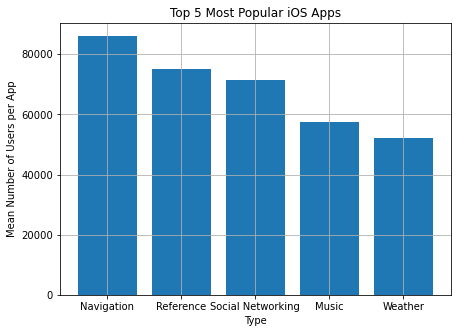

In [106]:
bar_n(
    ios_users,
    "Top 5 Most Popular iOS Apps",
    "Mean Number of Users per App",
)

The top 5 iOS app types with the highest mean average number of users per app are Navigation, Reference, Social Networking, Music, and Weather.

However, these mean averages may be skewed by a few particularly popular apps. For example, let us look at the number of users of the top 5 Navigation apps.

In [159]:
ios_nav = ios_clean[[
    "track_name",
    "rating_count_tot",
]].loc[
    ios_clean["prime_genre"] == "Navigation"
].sort_values(
    by = "rating_count_tot",
    ascending = False,
).set_index(
    "track_name",
)

# `ios_nav` is still a DataFrame at this point.
# It becomes a Series below.
ios_nav = ios_nav["rating_count_tot"]

sr_to_df(ios_nav, n_head = 5)

,track_name,number
0,"Waze - GPS Navigation, Maps & Real-time Traffic",345046
1,Google Maps - Navigation & Transit,154911
2,Geocaching®,12811
3,CoPilot GPS – Car Navigation & Offline Maps,3582
4,ImmobilienScout24: Real Estate Search in Germany,187


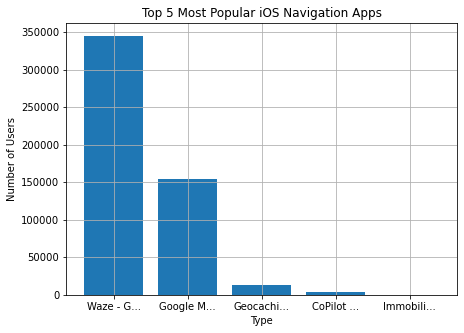

In [139]:
bar_n(
    ios_nav,
    "Top 5 Most Popular iOS Navigation Apps",
    "Number of Users",
    shorten = True,
)

Clearly, the distribution is skewed because Waze has such a high number of users. Therefore, a better measure of central tendency to use would be the median, not the mean.

Let us repeat the analysis using the median this time:

In [160]:
ios_users = users_by_type(
    ios_clean,
    "prime_genre",
    "rating_count_tot",
    moct = "median",
)

sr_to_df(ios_users, n_head = 5)

,index,number
0,Productivity,8737.5
1,Navigation,8196.5
2,Reference,6614.0
3,Shopping,5936.0
4,Social Networking,4199.0


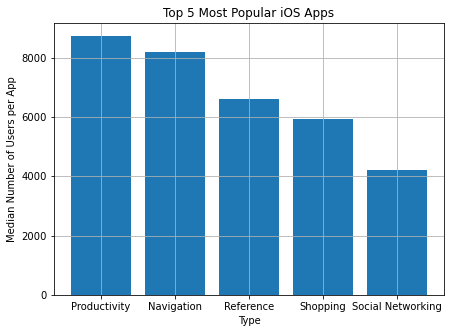

In [141]:
bar_n(
    ios_users,
    "Top 5 Most Popular iOS Apps",
    "Median Number of Users per App",
)

The top 5 most popular iOS apps by median number of users per app are:
- Productivity
- Navigation
- Reference
- Shopping
- Social Networking

These placements are quite different from the top 5 most common iOS apps (Games, Entertainment, Photo & Video, Education, and Social Networking).

---

**In general, we can say the following about the Apple App Store.**

- Apps for entertainment and fun, notably Games, are the most common apps.
- Apps for practical purposes, notably Productivity, are the most popular apps.

## Google Categories: Installs

Let us see which columns in the Google Play Store dataset can tell us about the number of users per app.

In [142]:
android_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


The "Installs" column seems like the best indicator of the number of users.

In [144]:
android_clean[["App", "Installs"]]

,App,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,"10,000+"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...","5,000,000+"
3,Sketch - Draw & Paint,"50,000,000+"
4,Pixel Draw - Number Art Coloring Book,"100,000+"
5,Paper flowers instructions,"50,000+"
...,...,...
10836,Sya9a Maroc - FR,"5,000+"
10837,Fr. Mike Schmitz Audio Teachings,100+
10838,Parkinson Exercices FR,"1,000+"
10839,The SCP Foundation DB fr nn5n,"1,000+"


The column contains strings which indicate the general range of how many users installed the apps. Since we cannot find the exact number of installs, we will simply remove the "+" signs and convert the numbers into integers.

In [145]:
android_clean["Installs"] = [int(re.sub("[,+]", "", text))
                            for text in android_clean["Installs"]]

android_clean[["Installs"]]

,Installs
0,10000
2,5000000
3,50000000
4,100000
5,50000
...,...
10836,5000
10837,100
10838,1000
10839,1000


Let us now see which app categories are most popular. We will use the median average here, as we did for iOS apps.

In [161]:
android_users = users_by_type(
    android_clean,
    "Category",
    "Installs",
    moct = "median",
)

sr_to_df(android_users, n_head = 10)

,index,number
0,ENTERTAINMENT,1000000.0
1,EDUCATION,1000000.0
2,GAME,1000000.0
3,PHOTOGRAPHY,1000000.0
4,SHOPPING,1000000.0
5,WEATHER,1000000.0
6,VIDEO_PLAYERS,1000000.0
7,COMMUNICATION,500000.0
8,FOOD_AND_DRINK,500000.0
9,HEALTH_AND_FITNESS,500000.0


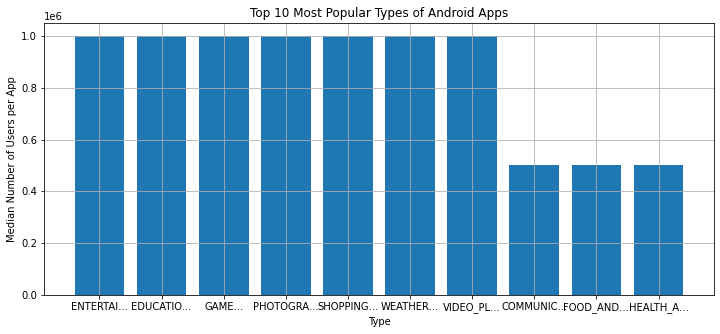

In [152]:
bar_n(
    android_users,
    "Top 10 Most Popular Types of Android Apps",
    "Median Number of Users per App",
    n = 10,
    shorten = True,
)

Since the top 5 spots all had the same median number of users per app (1000000), the graph was expanded to include the top 10 spots.

It appears that the types of Android apps with the highest median number of users per app are:

- GAME
- VIDEO_PLAYERS
- WEATHER
- EDUCATION
- ENTERTAINMENT
- PHOTOGRAPHY
- SHOPPING

---

In general, we can say the following about the Google Play Store:

- Both fun apps and practical apps are very common.
- The most popular apps are also a mix of fun apps and practical apps.

# App Profile Ideas

Based on the results, we can now determine a profitable app profile for the hypothetical app company.

Here is a summary of the findings on the 2 app stores.

- The Google Play Store has a **balanced mix** of fun and practical apps, so we can pick either kind.
- On the other hand, the Apple App Store appears to be **oversaturated with game apps**, and **practical apps are more popular**.

Therefore, in order to get the most users, the app company can set themselves apart in the Apple App Store by developing a useful **practical app**.

The most popular types of practical apps for the Apple App Store would be:

- Productivity
- Navigation
- Reference
- Shopping

For the Google Play Store, these would be:

- Weather
- Education
- Photography
- Shopping

Shopping appears in both lists, so it may be the most profitable type of app. However, the app company would have to make a unique app that has an edge over existing popular shopping apps. The same would apply for making a navigation app.

Considering that Reference and Education apps are popular, perhaps these two types could be combined into one app. First, let us find out the titles of the most popular apps in these genres.

In [162]:
reference_popularity = ios_clean[[
    "track_name",
    "rating_count_tot"
]].loc[
    ios_clean["prime_genre"] == "Reference"
].dropna(
).sort_values(
    "rating_count_tot",
    ascending = False,
).set_index(
    "track_name",
)["rating_count_tot"]

sr_to_df(reference_popularity, n_head = 5)

,track_name,number
0,Bible,985920
1,Dictionary.com Dictionary & Thesaurus,200047
2,Dictionary.com Dictionary & Thesaurus for iPad,54175
3,Google Translate,26786
4,"Muslim Pro: Ramadan 2017 Prayer Times, Azan, Q...",18418


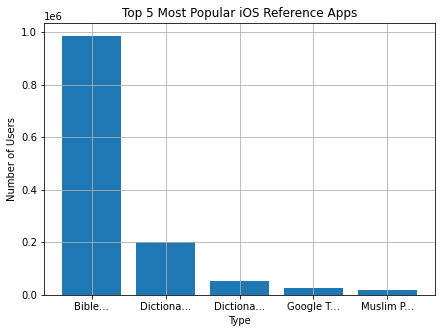

In [163]:
bar_n(
    reference_popularity,
    "Top 5 Most Popular iOS Reference Apps",
    "Number of Users",
    shorten = True,
)

In [164]:
education_popularity = android_clean[[
    "App",
    "Installs"
]].loc[
    android_clean["Category"] == "EDUCATION"
].dropna(
).sort_values(
    "Installs",
    ascending = False,
).set_index(
    "App",
)["Installs"]

sr_to_df(education_popularity, n_head = 5)

,App,number
0,Quizlet: Learn Languages & Vocab with Flashcards,10000000
1,"Learn languages, grammar & vocabulary with Mem...",10000000
2,Learn English with Wlingua,10000000
3,Remind: School Communication,10000000
4,Math Tricks,10000000


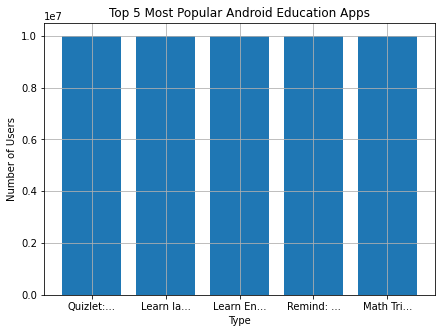

In [165]:
bar_n(
    education_popularity,
    "Top 5 Most Popular Android Education Apps",
    "Number of Users",
    shorten = True,
)

The most popular Reference apps are the Bible and some dictionary and translation apps. The most popular Education apps teach languages (especially English), or Math.

Therefore, the following are some ideas of a profitable app:

- An app containing the Bible, another religious text, or another well-known text. The app can additionally include reflections and theology/spirituality courses.
- An app that contains an English dictionary, a translator, and some quick guides on English vocabulary and grammar.
    - An app like the above, but for a different language that is spoken by many people.
- An app that teaches English and Math lessons. Perhaps it could be marketed as a practice app for an entrance exam.

# Conclusion

In this project, we analyzed app data from a Google Play Store dataset and an Apple App Store dataset. Apps were limited to free apps targeted towards English speakers, because the hypothetical app company makes these kinds of apps. The most common and popular app genres were determined.

In the end, several ideas of profitable apps were listed. The app company may now review the analysis and consider the suggestions. This may help them make an informed, data-driven decision regarding the next app that they will develop.